In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from pandas import concat

In [2]:
!git clone https://github.com/rhfo3218/LG_ML_tutorial.git
import os
os.chdir('/content/LG_ML_tutorial/9. Example_2_Quality_Management')

In [3]:
# load data
product = pd.read_csv('data.csv')
dataset = np.array(product)

# clustering

In [4]:
# dbscan
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

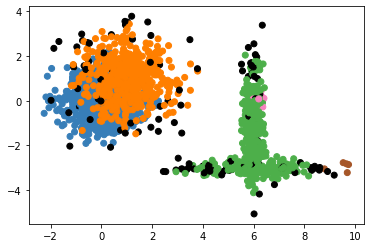

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [ 12, 988,   0,   0,   0,   0],
       [ 42,   0, 458,   0,   0,   0],
       [ 68,   0,   0, 417,  10,   5],
       [  0,   0,   0,   0,   0,   0]], dtype=int64)

In [20]:
dbscan = cluster.DBSCAN(eps=1.2,min_samples=5)
dbscan.fit(dataset[:,0:10])
dbscan_label = dbscan.labels_
max(dbscan_label)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                    int(max(dbscan_label) + 1))))
    # add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

plt.scatter(dataset[:,0],dataset[:,1],color = colors[dbscan_label])
plt.show()
confusion_matrix(dataset[:,10],dbscan_label)

c:\Users\HH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


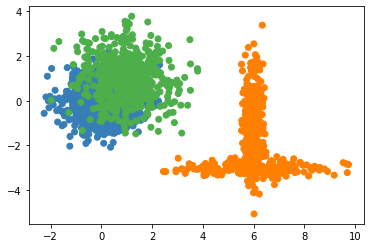

array([[   0,    0,    0,    0],
       [1000,    0,    0,    0],
       [   0,    0,  500,    0],
       [   0,  500,    0,    0]], dtype=int64)

In [21]:
# gmm
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit_predict(dataset[:,0:10])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']),
                                    int(max(gmm_label) + 1))))
    # add black color for outliers (if any)
colors = np.append(colors, ["#000000"])
plt.scatter(dataset[:,0],dataset[:,1],color = colors[gmm_label])
plt.show()
confusion_matrix(dataset[:,10],gmm_label)

# data split and model fitting

In [28]:
# import packages for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [30]:
# Normalize and train-test-split
# min-max normalize
scaler = MinMaxScaler()
scaler.fit(dataset)

maxs = scaler.data_max_
mins = scaler.data_min_

dataset = scaler.transform(dataset)
data_X = dataset[:,0:10]
data_y = dataset[:,11]

In [31]:
#product 1
product1_X = data_X[gmm_label==0,:]
product1_y = data_y[gmm_label==0]
#product 2
product2_X = data_X[gmm_label==1,:]
product2_y = data_y[gmm_label==1]
#product 3
product3_X = data_X[gmm_label==2,:]
product3_y = data_y[gmm_label==2]

# Product 1 , fitting

In [36]:
# train-test split
n_train_p1 = round(0.7*product1_X.shape[0])
tr_X_p1, ts_X_p1, tr_Y_p1, ts_Y_p1 = train_test_split(product1_X, product1_y, train_size=n_train_p1)

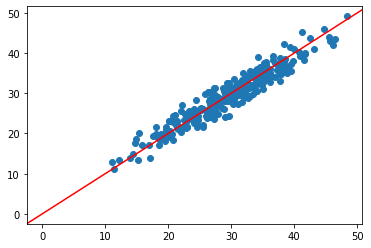

mae =  1.613
r2 =  0.914


In [37]:
# linear regression fitting 
linear_model_p1 = LinearRegression()
linear_model_p1.fit(tr_X_p1, tr_Y_p1)
lr_pred_p1 = linear_model_p1.predict(ts_X_p1)

spec_p1 = ts_Y_p1*(maxs[11]-mins[11]) + mins[11]
predicted_spec_p1 = lr_pred_p1*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec_p1,predicted_spec_p1)
plt.plot(spec_p1,spec_p1,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec_p1-predicted_spec_p1))
r2 = r2_score(spec_p1,predicted_spec_p1)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )

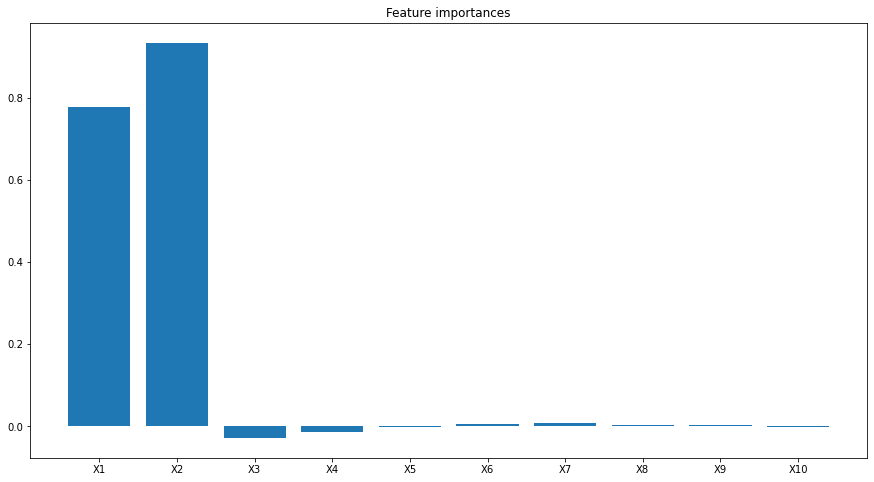

In [44]:
# product1 - feature importances 

# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'],linear_model_p1.coef_)
plt.title('Feature importances')       
plt.show()

# Product 2 , fitting

In [39]:
# train-test split
n_train_p2 = round(0.7*product2_X.shape[0])
tr_X_p2, ts_X_p2, tr_Y_p2, ts_Y_p2 = train_test_split(product2_X, product2_y, train_size=n_train_p2)

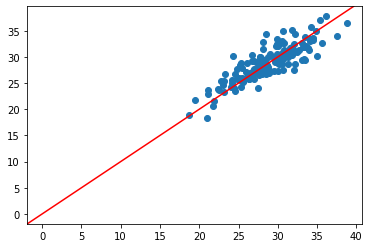

mae =  1.545
r2 =  0.717


In [41]:
# linear regression fitting 
linear_model_p2 = LinearRegression()
linear_model_p2.fit(tr_X_p2, tr_Y_p2)
lr_pred_p2 = linear_model_p2.predict(ts_X_p2)

spec_p2 = ts_Y_p2*(maxs[11]-mins[11]) + mins[11]
predicted_spec_p2 = lr_pred_p2*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec_p2,predicted_spec_p2)
plt.plot(spec_p2,spec_p2,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec_p2-predicted_spec_p2))
r2 = r2_score(spec_p2,predicted_spec_p2)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )

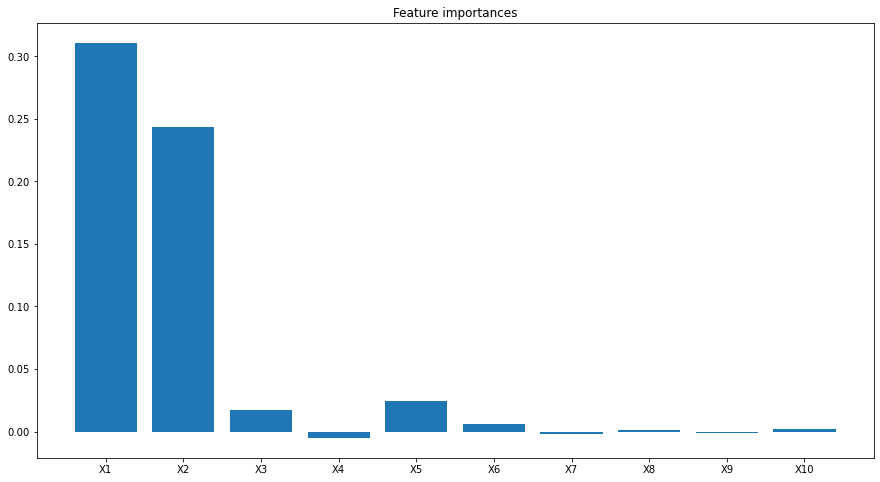

In [45]:
# product2 - feature importances 

# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'],linear_model_p2.coef_)
plt.title('Feature importances')       
plt.show()

# Product 3 , fitting

In [42]:
# train-test split
n_train_p3 = round(0.7*product3_X.shape[0])
tr_X_p3, ts_X_p3, tr_Y_p3, ts_Y_p3 = train_test_split(product3_X, product3_y, train_size=n_train_p3)

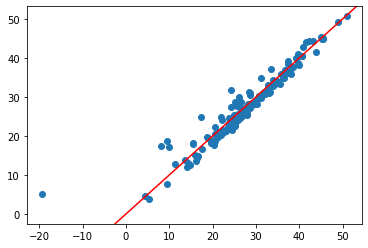

mae =  1.714
r2 =  0.907


In [43]:
# linear regression fitting 
linear_model_p3 = LinearRegression()
linear_model_p3.fit(tr_X_p3, tr_Y_p3)
lr_pred_p3 = linear_model_p3.predict(ts_X_p3)

spec_p3 = ts_Y_p3*(maxs[11]-mins[11]) + mins[11]
predicted_spec_p3 = lr_pred_p3*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec_p3,predicted_spec_p3)
plt.plot(spec_p3,spec_p3,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec_p3-predicted_spec_p3))
r2 = r2_score(spec_p3,predicted_spec_p3)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )

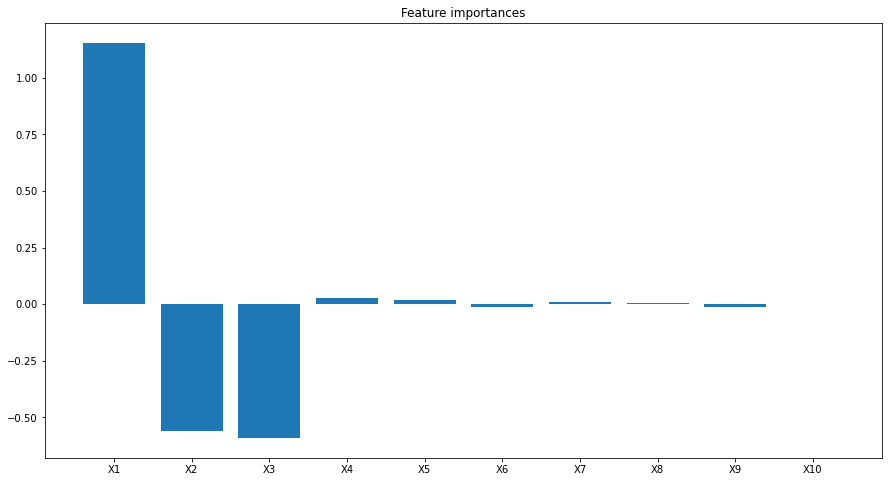

In [46]:
# product3 - feature importances 

# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10'],linear_model_p3.coef_)
plt.title('Feature importances')       
plt.show()

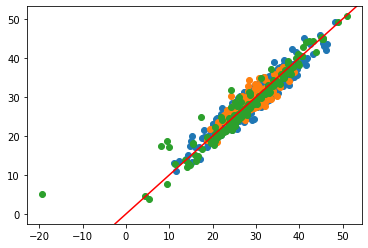

mae =  1.621
r2 =  0.863


In [51]:
# 한번에 학습 했을때랑 차이  
plt.scatter(spec_p1,predicted_spec_p1)
plt.scatter(spec_p2,predicted_spec_p2)
plt.scatter(spec_p3,predicted_spec_p3)
plt.plot(predicted_spec_p3,predicted_spec_p3,ls = "--", color ='r')
plt.show()

mae_p1 = np.mean(np.abs(spec_p1-predicted_spec_p1))
mae_p2 = np.mean(np.abs(spec_p2-predicted_spec_p2))
mae_p3 = np.mean(np.abs(spec_p3-predicted_spec_p3))
r2_p1 = r2_score(spec_p1,predicted_spec_p1)
r2_p2 = r2_score(spec_p2,predicted_spec_p2)
r2_p3 = r2_score(spec_p3,predicted_spec_p3)

mae = (mae_p1*n_train_p1 + mae_p2*n_train_p2 + mae_p3*n_train_p3)/(n_train_p1+n_train_p2+n_train_p3)
r2 = (r2_p1*n_train_p1 + r2_p2*n_train_p2 + r2_p3*n_train_p3)/(n_train_p1+n_train_p2+n_train_p3)
print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )


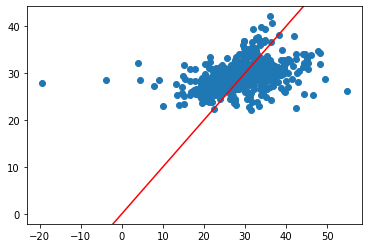

mae =  4.801
r2 =  0.164


In [55]:
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)
# linear regression fitting 
linear_model = LinearRegression()
linear_model.fit(tr_X, tr_Y)
lr_pred = linear_model.predict(ts_X)

spec = ts_Y*(maxs[11]-mins[11]) + mins[11]
predicted_spec = lr_pred*(maxs[11]-mins[11]) + mins[11]
# true spec vs predicted spec
plt.scatter(spec,predicted_spec)
plt.plot(spec,spec,ls = "--", color ='r')
plt.show()

mae = np.mean(np.abs(spec-predicted_spec))
r2 = r2_score(spec,predicted_spec)

print("mae = ", np.round(mae, 3))
print("r2 = ", np.round(r2,3) )